### Feature Enginering Practice


#### Handling Missing Value..

In [2]:
import seaborn as sns

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


1. Detect Missing Values

Task:
- Count the number of missing values in each column.
- Print only the columns that contain at least one missing value.


In [4]:
missing_value = df.isnull().sum()

missing_value[missing_value > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

2. Drop Rows with Missing Values

In [5]:
df.shape

(891, 15)

In [6]:
drop_na = df.dropna()
drop_na.shape



(182, 15)

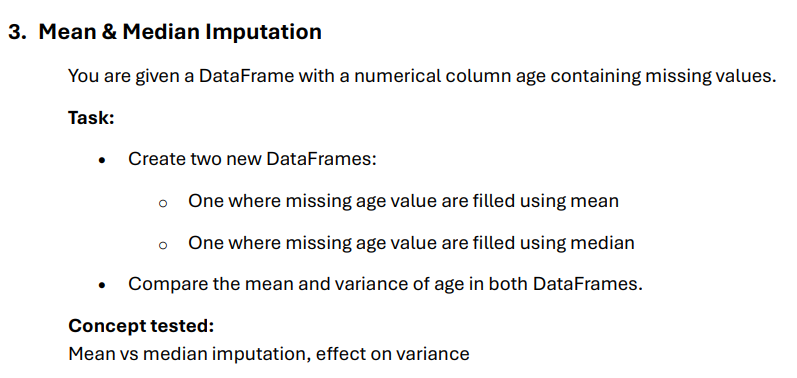

In [7]:
# mean
df['age_mean'] = df['age'].fillna(df['age'].mean())

df[['age_mean','age']]

# median
df['age_median'] = df['age'].fillna(df['age'].median())
df[['age','age_mean','age_median']]

,age,age_mean,age_median
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,NaN,29.699118,28.0
889,26.0,26.000000,26.0


In [8]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_mean         0
age_median       0
dtype: int64

4. Mode Imputation for Categorical Data

In [9]:
mode_value = df[df['sex'].notna()]['sex'].mode()[0]

df['sex_mode'] = df['sex'].fillna(mode_value)
df[['sex','sex_mode']]

,sex,sex_mode
0,male,male
1,female,female
2,female,female
3,female,female
4,male,male
...,...,...
886,male,male
887,female,female
888,female,female
889,male,male


5. Fill missing age values with mean age per gender


In [10]:
df['age'] = df['age'].fillna(df.groupby('sex')['age'].transform('mean'))
df['age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    27.915709
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

#### Imbalance Dataset

1. Create an imbalanced dataset with:
- 200 samples
- 2 features
- 80% class 0 and 20% class 1

Print the class distribution. 


In [11]:
import numpy as np
import pandas as pd

In [12]:
x = np.random.rand(200,2)
y = np.array([0]*160 + [1]*40)

df = pd.DataFrame(x,columns=['feature1','feature2'])
df['Target'] = y

df

,feature1,feature2,Target
0,0.756872,0.489294,0
1,0.625565,0.430688,0
2,0.940601,0.349485,0
3,0.687259,0.409939,0
4,0.197506,0.184373,0
...,...,...,...
195,0.182898,0.672392,1
196,0.531736,0.903024,1
197,0.261418,0.577765,1
198,0.503158,0.558243,1


upsampling the dataset

In [13]:
from sklearn.utils import resample

In [14]:
# seperate the dataset
df_majority = df[df['Target']== 0]
df_minority = df[df['Target']==1]

# upsampling minority class
df_minority_upsampled = resample(
    df_minority,
    replace = True,
    n_samples=len(df_majority),
    random_state=42
)
df_upsampled = pd.concat([df_majority,df_minority_upsampled])
# 
df_upsampled['Target'].value_counts()

Target
0    160
1    160
Name: count, dtype: int64

<!-- Downsample -->

In [15]:
# Down Sampled

df_majority = df[df['Target']==0]
df_minority = df[df['Target'] == 1]

# 
df_majority_downsampled = resample(
    df_majority,
    replace=False,
    n_samples=len(df_minority),
    random_state=42
)

df_sampled = pd.concat([df_minority,df_majority_downsampled])
print(df_sampled['Target'].value_counts())
print('\nDataset balanced...')

Target
1    40
0    40
Name: count, dtype: int64

Dataset balanced...


In [16]:
df

,feature1,feature2,Target
0,0.756872,0.489294,0
1,0.625565,0.430688,0
2,0.940601,0.349485,0
3,0.687259,0.409939,0
4,0.197506,0.184373,0
...,...,...,...
195,0.182898,0.672392,1
196,0.531736,0.903024,1
197,0.261418,0.577765,1
198,0.503158,0.558243,1


In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
x = df[['feature1','feature2']]
y = df['Target']



In [19]:
# using smot
smote = SMOTE(k_neighbors=2,random_state=42)
x_resample,y_resample = smote.fit_resample(x,y)

y_resample.value_counts()

# 

df_new = pd.DataFrame(x_resample,columns=['feature1','feature2'])
df_new['Target'] = y_resample

df_new['Target'].value_counts()

Target
0    160
1    160
Name: count, dtype: int64

Question 6 (Real-World Style)
You are working on a fraud detection dataset where:
 0 → Not Fraud (95%)
 1 → Fraud (5%)
Write code to:
 Balance the dataset using downsampling
 Explain in 1 line why downsampling may be risky here

In [20]:
x = np.random.rand(100,2)

y = np.array([0]*95 + [1]*5)

# 
df = pd.DataFrame(x,columns=['Email1','Email2'])
df['fraud'] = y

df['fraud'].value_counts()

fraud
0    95
1     5
Name: count, dtype: int64

In [21]:
df_majority = df[df['fraud'] == 0]
df_minority = df[df['fraud'] == 1]

# 
df_majority_downsample = resample(
    df_majority,
    replace = True,
    n_samples=len(df_minority),
    random_state=42
)
df_downsampled = pd.concat([df_minority,df_majority_downsample])

df_downsampled['fraud'].value_counts()

# Downsampling is risky because it discards a large amount of legitimate transaction data, potentially losing important fraud patterns.
# Solution : use SMOTE


fraud
1    5
0    5
Name: count, dtype: int64

Using SMOT

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [23]:
x = df[['Email1','Email2']]
y = df['fraud']

In [24]:
smote = SMOTE(random_state=42,k_neighbors=2)

X_resampled, y_resampled = smote.fit_resample(x, y)


y_resampled.value_counts()

# 
df_new = pd.DataFrame(X_resampled,columns=['Email1','Email2'])
df_new['fraud'] = y_resampled
df_new['fraud'].value_counts()
df_new


,Email1,Email2,fraud
0,0.314018,0.745091,0
1,0.270290,0.377983,0
2,0.810780,0.121582,0
3,0.374549,0.665111,0
4,0.040826,0.016896,0
...,...,...,...
185,0.401461,0.259076,1
186,0.033833,0.592610,1
187,0.050418,0.487261,1
188,0.189116,0.299916,1


---

#### Data Encoding

In [25]:
# import packages
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder


##### One Hot Encoding

1. A dataset contains a column named Color with the values Red, Blue, Green, Red, and Blue.
Write Python code to apply One-Hot Encoding to this column and combine the encoded
columns with the original dataset. 

In [26]:
data = {
    'color':['Red','Blue','Green','Red','Blue']
}
df = pd.DataFrame(data)
df

,color
0,Red
1,Blue
2,Green
3,Red
4,Blue


In [27]:
# Create an instance of encoder .....
encoder = OneHotEncoder()

# perform fit and transform ....
encoded = encoder.fit_transform(df[['color']]).toarray()

# Convert in DataFrame....
encoder_df = pd.DataFrame(encoded , columns=encoder.get_feature_names_out())
encoder_df

# combine data...
new_df = pd.concat([df,encoder_df],axis=1)
new_df

,color,color_Blue,color_Green,color_Red
0,Red,0.0,0.0,1.0
1,Blue,1.0,0.0,0.0
2,Green,0.0,1.0,0.0
3,Red,0.0,0.0,1.0
4,Blue,1.0,0.0,0.0


2. A dataset has two columns: City (Delhi, Mumbai, Chennai, Delhi) and Sales (100, 200, 150,
180). Write Python code to apply One-Hot Encoding to the City column while keeping the
Sales column unchanged. 

In [28]:
data = {
    'city':['Delhi','mumbai','chennai','delhi'],
    'sales':[100,200,150,180]
}

df = pd.DataFrame(data)
df

,city,sales
0,Delhi,100
1,mumbai,200
2,chennai,150
3,delhi,180


In [29]:
# create an instance 
encoder = OneHotEncoder()

# perform fit and transform
encoded = encoder.fit_transform(df[['city']]).toarray()

# convert into dataframe..
encoder_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

# Combine dataframe
new_df = pd.concat([df,encoder_df],axis=1)
new_df

,city,sales,city_Delhi,city_chennai,city_delhi,city_mumbai
0,Delhi,100,1.0,0.0,0.0,0.0
1,mumbai,200,0.0,0.0,0.0,1.0
2,chennai,150,0.0,1.0,0.0,0.0
3,delhi,180,0.0,0.0,1.0,0.0


3. A dataset contains a column named Department with the values HR, IT, Finance, IT, and
HR. Write Python code to perform One-Hot Encoding on this column using the drop first
option to avoid the dummy variable trap. 

In [30]:
data = {
    'department':['HR',"IT",'Finance','IT','HR']
}
df = pd.DataFrame(data)
df

,department
0,HR
1,IT
2,Finance
3,IT
4,HR


In [31]:
encoder_df = pd.get_dummies(df,columns=['department'],drop_first=True,dtype=int)
encoder_df 

,department_HR,department_IT
0,1,0
1,0,1
2,0,0
3,0,1
4,1,0


4. A dataset contains two categorical columns: Gender (Male, Female, Male, Female) and
City (Delhi, Mumbai, Delhi, Chennai). Write Python code to apply One-Hot Encoding to
both columns simultaneously. 


In [32]:
data = {
    'gender':['male','female','male','female'],
    'city':['delhi','mumbai','delhi','chennai']
}

df_gender = pd.DataFrame(data)
df_gender 

,gender,city
0,male,delhi
1,female,mumbai
2,male,delhi
3,female,chennai


In [39]:
encoder = OneHotEncoder()

# apply fit and transform
encoded = encoder.fit_transform(df_gender[['gender','city']]).toarray()

# convert in dataframe 
encoder_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

# combine data
new_df = pd.concat([df_gender,encoder_df],axis=1)
new_df

,gender,city,gender_female,gender_male,city_chennai,city_delhi,city_mumbai
0,male,delhi,0.0,1.0,0.0,1.0,0.0
1,female,mumbai,1.0,0.0,0.0,0.0,1.0
2,male,delhi,0.0,1.0,0.0,1.0,0.0
3,female,chennai,1.0,0.0,1.0,0.0,0.0


##### Label Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder


6. A dataset contains a column named Status with values Placed, Not Placed, Placed, and
Placed. Write Python code to convert this column into numerical format using Label
Encoding. 

In [99]:
data = {
    'status':['Placed','Not Placed','Placed','Placed']
}

df = pd.DataFrame(data)
df

# create instance
lbl_encoder = LabelEncoder()

# fit and transform
df['status_encoded'] = lbl_encoder.fit_transform(df['status'])

df



,status,status_encoded
0,Placed,1
1,Not Placed,0
2,Placed,1
3,Placed,1


7. A dataset contains two columns: Marks and Result, where Result has values Pass and Fail.
Write Python code to apply Label Encoding only to the Result column. 

In [98]:
data = {
    'Marks': [85, 42, 73, 30, 90],
    'Result': ['Pass', 'Fail', 'Pass', 'Fail', 'Pass']
}

df = pd.DataFrame(data)
df

# create instance
lbl_encoder = LabelEncoder()

# apply fit and transform
df['Result_encoded'] = lbl_encoder.fit_transform(df['Result'])

df 




,Marks,Result,Result_encoded
0,85,Pass,1
1,42,Fail,0
2,73,Pass,1
3,30,Fail,0
4,90,Pass,1


8. A dataset contains two categorical columns named City and Department. Write Python
code to apply Label Encoding separately to both columns. 


In [97]:
data = {
    'City': ['Mumbai', 'Delhi', 'Chennai', 'Delhi', 'Mumbai'],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'HR']
}

df = pd.DataFrame(data)
df

# create instance 
lbl_encoder = LabelEncoder()

# fit and tranform
df['City_encoded'] = lbl_encoder.fit_transform(df['City'])
df['Department_encoded'] = lbl_encoder.fit_transform(df['Department'])

df



,City,Department,City_encoded,Department_encoded
0,Mumbai,HR,2,1
1,Delhi,IT,1,2
2,Chennai,Finance,0,0
3,Delhi,IT,1,2
4,Mumbai,HR,2,1


9. A dataset contains a column Gender with values Male and Female. Write Python code to
apply Label Encoding and store the encoder so it can be reused later for new data. 

In [79]:
import joblib

In [ ]:
# Sample dataset
data = {
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male']
}

df = pd.DataFrame(data)

# create instance
lbl_encoder = LabelEncoder()

# fit and transfrom
df['new_Gender'] = lbl_encoder.fit_transform(df['Gender'])

df

# # Save the encoder to reuse later
joblib.dump(lbl_encoder, 'gender_encoder.pkl')




,Gender,new_Gender
0,Male,1
1,Female,0
2,Female,0
3,Male,1
4,Male,1


In [86]:
### Use later 
# Load the saved encoder
loaded_encoder = joblib.load('gender_encoder.pkl')

# Transform new data
new_data = ['Male', 'Female']
encoded_new = loaded_encoder.transform(new_data)

encoded_new

array([1, 0])

##### Ordinal Encoding: 


In [89]:
from sklearn.preprocessing import OrdinalEncoder

11. A dataset contains a column Size with values Small, Medium, Large, and Medium. Write
Python code to apply Ordinal Encoding using the order Small < Medium < Large. 


In [94]:
data = {
    'Size':['Small','Medium','Large','Medium','Medium','Small','Large']
}

df = pd.DataFrame(data)
df

# create instance and define order
ord_encoder = OrdinalEncoder(categories=[['Small','Medium','Large']])

# fit and transform..
df['Size_encoded'] = ord_encoder.fit_transform(df[['Size']])

df

,Size,Size_encoded
0,Small,0.0
1,Medium,1.0
2,Large,2.0
3,Medium,1.0
4,Medium,1.0
5,Small,0.0
6,Large,2.0


12. A dataset contains a column Education Level with values High School, Bachelor, Master,
and PhD. Write Python code to apply Ordinal Encoding while preserving the correct
educational hierarchy. 

In [107]:
data = {
    'Education Level': ['Bachelor', 'Master', 'PhD', 'High School', 'Master']
}

df = pd.DataFrame(data)

# create instance and define order

ord_encoder = OrdinalEncoder(categories=[['High School','Bachelor','Master','PhD']])

# fit and transform
df['Edu.Level_encoded'] = ord_encoder.fit_transform(df[['Education Level']])

df




,Education Level,Edu.Level_encoded
0,Bachelor,1.0
1,Master,2.0
2,PhD,3.0
3,High School,0.0
4,Master,2.0


13. A dataset contains a column Rating with values Poor, Average, Good, and Excellent. Write
Python code to apply Ordinal Encoding based on the natural order of these categories. 


In [ ]:
# Sample dataset
data = {
    'Rating': ['Good', 'Excellent', 'Poor', 'Average', 'Good']
}

df = pd.DataFrame(data)

# Define natural order
rating_order = ['Poor', 'Average', 'Good', 'Excellent']

# Create OrdinalEncoder with specified category order
encoder = OrdinalEncoder(categories=[rating_order])

# Apply encoding
df['Rating_encoded'] = encoder.fit_transform(df[['Rating']])

df


,Rating,Rating_encoded
0,Good,2.0
1,Excellent,3.0
2,Poor,0.0
3,Average,1.0
4,Good,2.0


14. A dataset contains two ordered categorical columns: Size (Small, Medium, Large) and
Quality (Low, Medium, High). Write Python code to apply Ordinal Encoding to both columns
using their respective category orders. 

In [112]:
# Sample dataset
data = {
    'Size': ['Small', 'Medium', 'Large', 'Small', 'Large'],
    'Quality': ['Low', 'Medium', 'High', 'High', 'Medium']
}

df = pd.DataFrame(data)

# Define category orders
size_order = ['Small', 'Medium', 'Large']
quality_order = ['Low', 'Medium', 'High']

# Create OrdinalEncoder with respective orders
encoder = OrdinalEncoder(categories=[size_order, quality_order])

# Apply encoding
df[['Size_encode', 'Quality_encoded']] = encoder.fit_transform(df[['Size', 'Quality']])

df

,Size,Quality,Size_encode,Quality_encoded
0,Small,Low,0.0,0.0
1,Medium,Medium,1.0,1.0
2,Large,High,2.0,2.0
3,Small,High,0.0,2.0
4,Large,Medium,2.0,1.0
